In [1]:
import numpy as np
import pandas as pd
from pandas import option_context
pd.set_option('display.max_colwidth', None)
import matplotlib.pyplot as plt

from load_datasets import load_phishing, load_mushrooms, load_german, load_w1a, load_w3a, load_a2a, load_w6a
from models import LogisticRegression
from ml_utils import run_solvers, optim_data, run_bench, optim_bench, models_summary, diagnostic
#from solvers_utils import logistic, logistic_der, f_and_df

C:\Users\Utente\AppData\Local\Temp\ipykernel_10144\704364555.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
C = 0.5

# w1a

In [3]:
data_w1a = load_w1a()

X_train = (2477, 301), y_train = (2477,)
X_test = (47272, 301), y_test = (47272,)
Class distribution: {-1.0: 0.9709325797335486, 1.0: 0.029067420266451354}


In [25]:
Mw1a = 32
print(f"Iterations: {data_w1a[1].size / Mw1a}")

Iterations: 77.40625


## Benchmark

In [5]:
benchw1a = run_bench(data_w1a, C)

benchw1a_data = optim_bench(benchw1a)

## SGD

In [6]:
# BatchGD-Fixed
batchfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, data_w1a[1].size)

# SGD-Fixed
sgdfixed_w1a = run_solvers("SGD-Fixed", C, data_w1a, Mw1a)

# SGD-Decreasing
sgddecre_w1a = run_solvers("SGD-Decreasing", C, data_w1a, Mw1a)

# SGDM
sgdm_w1a = run_solvers("SGDM", C, data_w1a, Mw1a)

In [20]:
# SGD-Armijo
sgdarmijo_w1a = run_solvers("SGD-Armijo", C, data_w1a, Mw1a)

In [ ]:
# MSL-SGDM-C
mslc_w1a = run_solvers("MSL-SGDM-C", C, data_w1a, Mw1a)

# MSL-SGDM-R
mslr_w1a = run_solvers("MSL-SGDM-R", C, data_w1a, Mw1a)

In [21]:
modelsw1a_data = optim_data(batchfixed_w1a + sgdfixed_w1a + sgddecre_w1a + sgdm_w1a + sgdarmijo_w1a + mslc_w1a + mslr_w1a)

## Summary

In [22]:
models_summary(modelsw1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
3,SGD-Fixed,0.5,2477.0,1.00,0.0,0.464614,2.987466e-16,0.166709,200,0.970933,0.970236,0.500000,0.500000,0.667394
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,4.563869e-05,NaN,6,0.970933,0.970236,0.500000,0.500000,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,8.613627e-06,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,2.333669e-05,NaN,7,0.970933,0.970236,0.500000,0.500000,0.667406
10,SGD-Decreasing,0.5,32.0,0.10,0.0,0.464614,3.223885e-05,2.687624,200,0.970933,0.970236,0.500000,0.500000,0.667409
4,SGD-Fixed,0.5,2477.0,0.10,0.0,0.464614,8.167528e-05,0.153667,200,0.970933,0.970236,0.500000,0.500000,0.667393
9,SGD-Decreasing,0.5,32.0,1.00,0.0,0.464614,3.964254e-04,2.687594,200,0.970933,0.970236,0.500000,0.500000,0.667487
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.464615,9.837897e-04,2.704039,200,0.970933,0.970236,0.500000,0.500000,0.667700
13,SGDM,0.5,32.0,0.10,0.9,0.464616,1.427547e-03,2.656704,200,0.970933,0.970236,0.500000,0.500000,0.667781
12,SGDM,0.5,32.0,1.00,0.9,0.464762,1.268830e-02,2.685458,200,0.970933,0.970236,0.500000,0.500000,0.672487


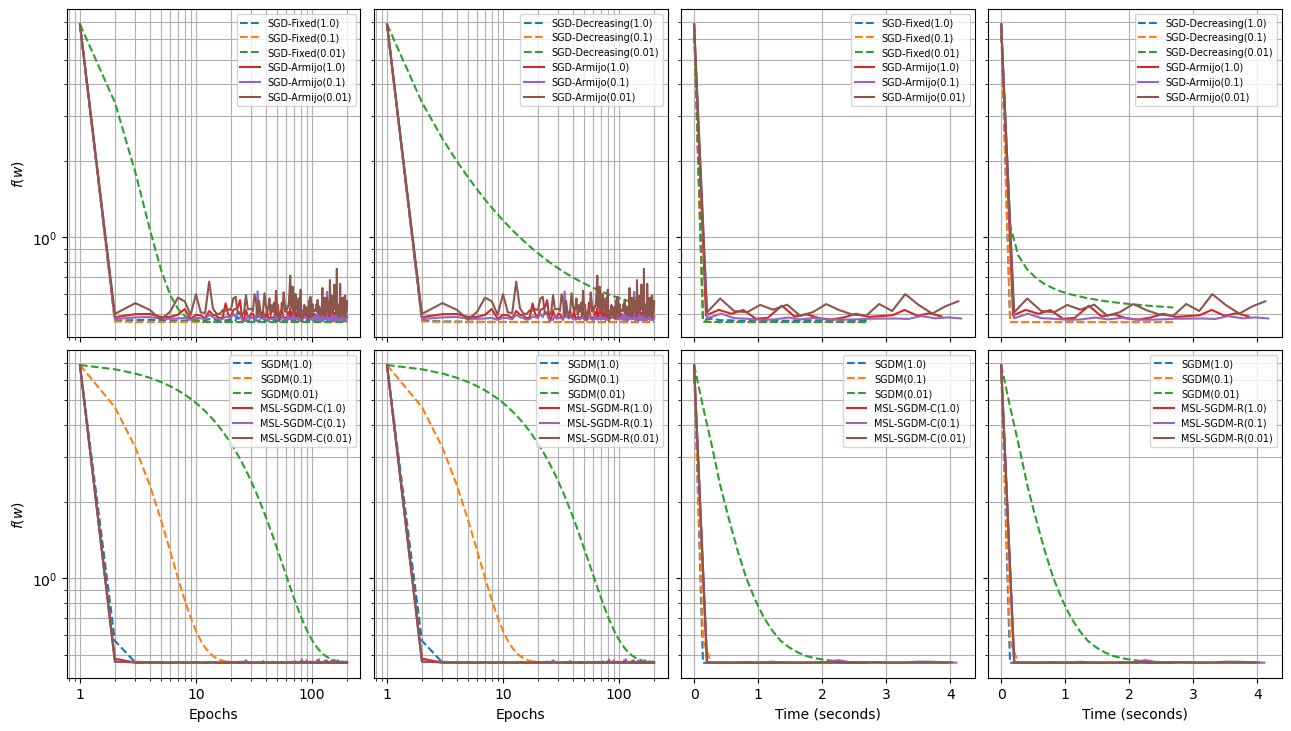

In [23]:
diagnostic(
    optim_data(sgdfixed_w1a + sgdarmijo_w1a),
    optim_data(sgddecre_w1a + sgdarmijo_w1a),
    optim_data(sgdm_w1a + mslc_w1a),
    optim_data(sgdm_w1a + mslr_w1a),
    benchw1a[0])
plt.savefig("./plots/w1a-diagnostic.pdf")

## Fine-tuning

In [26]:
batchfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, data_w1a[1].size, 0.75)

sgdfixed_w1a1 = LogisticRegression("SGD-Fixed", C).fit(data_w1a, Mw1a, 0.005)

sgddecre_w1a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w1a, Mw1a, 1)

In [35]:
sgdm_w1a1 = LogisticRegression("SGDM", C).fit(data_w1a, Mw1a, 0.05, 0.9)

In [95]:
sgdarmijo_w1a1 = LogisticRegression("SGD-Armijo", C).fit(data_w1a, Mw1a, 0.05, damp_armijo=0.5)

In [ ]:
mslc_w1a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5, damp_momentum=0.5)

In [ ]:
mslr_w1a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w1a, Mw1a, 0.5, 0.9, damp_armijo=0.5)

In [107]:
fine_w1a_data = optim_data([batchfixed_w1a1, sgdfixed_w1a1, sgddecre_w1a1, sgdm_w1a1, sgdarmijo_w1a1, mslc_w1a1, mslr_w1a1])

test_w1a = models_summary(fine_w1a_data, benchw1a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_w1a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.464614,0.000046,NaN,6,0.970933,0.970236,0.5,0.5,0.667394
2,CG,0.5,NaN,NaN,NaN,0.464614,0.000009,NaN,7,0.970933,0.970236,0.5,0.5,0.667395
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.464614,0.000023,NaN,7,0.970933,0.970236,0.5,0.5,0.667406
3,SGD-Fixed,0.5,2477.0,0.750,0.0,0.464614,0.000791,0.014591,17,0.970933,0.970236,0.5,0.5,0.667386
5,SGD-Decreasing,0.5,32.0,1.000,0.0,0.464615,0.000973,1.155595,85,0.970933,0.970236,0.5,0.5,0.667680
6,SGDM,0.5,32.0,0.050,0.9,0.464615,0.000989,1.274373,94,0.970933,0.970236,0.5,0.5,0.667121
4,SGD-Fixed,0.5,32.0,0.005,0.0,0.464615,0.000970,0.546509,41,0.970933,0.970236,0.5,0.5,0.667321
8,MSL-SGDM-C,0.5,32.0,0.500,0.9,0.466033,0.042922,12.908739,600,0.970933,0.970236,0.5,0.5,0.696570
9,MSL-SGDM-R,0.5,32.0,0.500,0.9,0.466033,0.042922,12.890633,600,0.970933,0.970236,0.5,0.5,0.696570
7,SGD-Armijo,0.5,32.0,0.050,0.0,0.483484,0.145005,12.424554,600,0.970933,0.970236,0.5,0.5,0.776803


In [108]:
print(test_w1a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 6 & NaN & 0.464614 & 0.000046 & 0.970236 \\
CG & NaN & 7 & NaN & 0.464614 & 0.000009 & 0.970236 \\
L-BFGS-B & NaN & 7 & NaN & 0.464614 & 0.000023 & 0.970236 \\
SGD-Fixed & 0.750000 & 17 & 0.014591 & 0.464614 & 0.000791 & 0.970236 \\
SGD-Decreasing & 1.000000 & 85 & 1.155595 & 0.464615 & 0.000973 & 0.970236 \\
SGDM & 0.050000 & 94 & 1.274373 & 0.464615 & 0.000989 & 0.970236 \\
SGD-Fixed & 0.005000 & 41 & 0.546509 & 0.464615 & 0.000970 & 0.970236 \\
MSL-SGDM-C & 0.500000 & 600 & 12.908739 & 0.466033 & 0.042922 & 0.970236 \\
MSL-SGDM-R & 0.500000 & 600 & 12.890633 & 0.466033 & 0.042922 & 0.970236 \\
SGD-Armijo & 0.050000 & 600 & 12.424554 & 0.483484 & 0.145005 & 0.970236 \\
\bottomrule
\end{tabular}



# w3a

In [48]:
data_w3a = load_w3a()

X_train = (4912, 301), y_train = (4912,)
X_test = (44837, 301), y_test = (44837,)
Class distribution: {-1.0: 0.9708876221498371, 1.0: 0.029112377850162866}


In [49]:
Mw3a = 64
print(f"Iterations: {data_w3a[1].size / Mw3a}")

Iterations: 76.75


## Benchmark

In [50]:
benchw3a = run_bench(data_w3a, C)

benchw3a_data = optim_bench(benchw3a)

## SGD

In [51]:
# BatchGD-Fixed
batchfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, data_w3a[1].size)

# SGD-Fixed
sgdfixed_w3a = run_solvers("SGD-Fixed", C, data_w3a, Mw3a)

# SGD-Decreasing
sgddecre_w3a = run_solvers("SGD-Decreasing", C, data_w3a, Mw3a)

# SGDM
sgdm_w3a = run_solvers("SGDM", C, data_w3a, Mw3a)

# SGD-Armijo
sgdarmijo_w3a = run_solvers("SGD-Armijo", C, data_w3a, Mw3a)

# MSL-SGDM-C
mslc_w3a = run_solvers("MSL-SGDM-C", C, data_w3a, Mw3a)

# MSL-SGDM-R
mslr_w3a = run_solvers("MSL-SGDM-R", C, data_w3a, Mw3a)

In [52]:
modelsw3a_data = optim_data(batchfixed_w3a + sgdfixed_w3a + sgddecre_w3a + sgdm_w3a + sgdarmijo_w3a + mslc_w3a + mslr_w3a)

## Summary

In [53]:
models_summary(modelsw3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,1.083164e-05,NaN,6,0.970888,0.970203,0.500000,0.500000,0.666640
3,SGD-Fixed,0.5,4912.0,1.00,0.0,0.462742,1.468397e-16,0.246946,200,0.970888,0.970203,0.500000,0.500000,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,2.176325e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666648
10,SGD-Decreasing,0.5,64.0,0.10,0.0,0.462742,2.245811e-05,2.766748,200,0.970888,0.970203,0.500000,0.500000,0.666654
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,3.267110e-05,NaN,7,0.970888,0.970203,0.500000,0.500000,0.666658
4,SGD-Fixed,0.5,4912.0,0.10,0.0,0.462742,8.164157e-05,0.253034,200,0.970888,0.970203,0.500000,0.500000,0.666639
9,SGD-Decreasing,0.5,64.0,1.00,0.0,0.462742,2.262531e-04,2.768284,200,0.970888,0.970203,0.500000,0.500000,0.666628
8,SGD-Fixed,0.5,64.0,0.01,0.0,0.462742,6.384729e-04,2.750072,200,0.970888,0.970203,0.500000,0.500000,0.666490
13,SGDM,0.5,64.0,0.10,0.9,0.462743,1.069982e-03,2.733534,200,0.970888,0.970203,0.500000,0.500000,0.666326
12,SGDM,0.5,64.0,1.00,0.9,0.462848,1.069797e-02,2.735298,200,0.970888,0.970203,0.500000,0.500000,0.663021


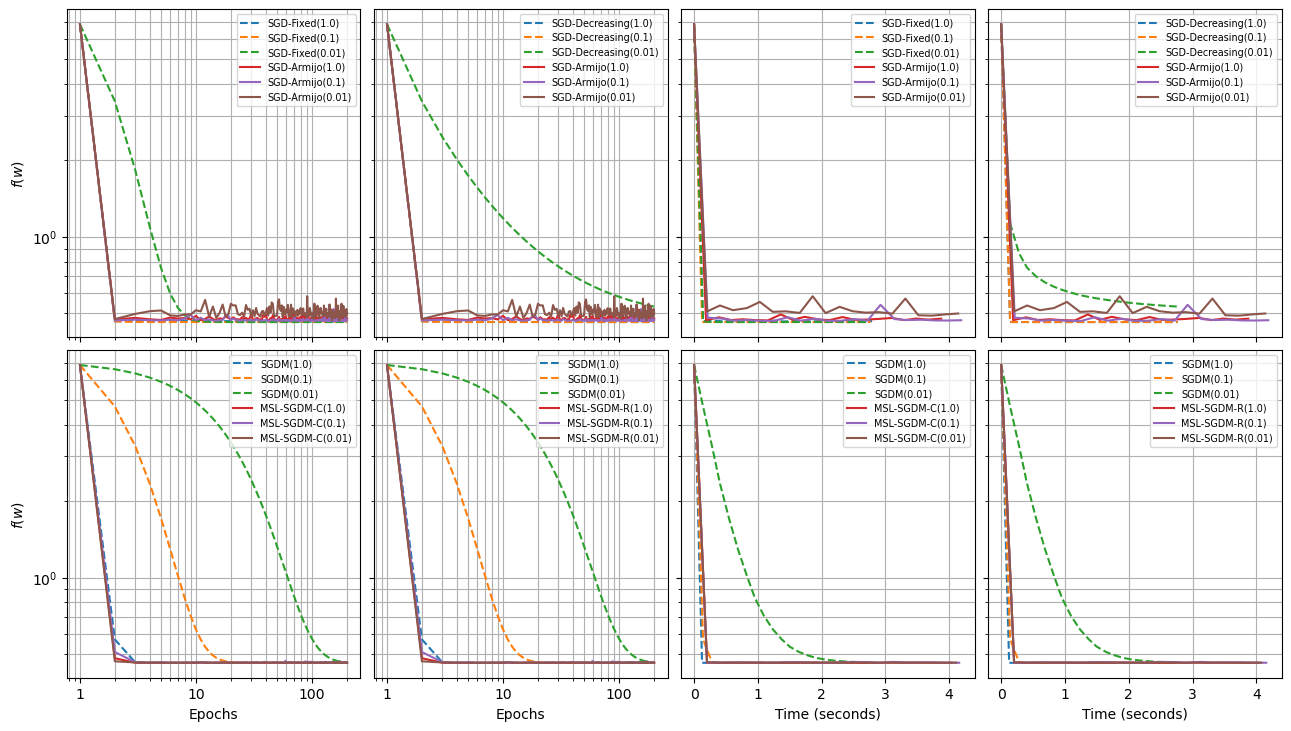

In [54]:
diagnostic(
    optim_data(sgdfixed_w3a + sgdarmijo_w3a),
    optim_data(sgddecre_w3a + sgdarmijo_w3a),
    optim_data(sgdm_w3a + mslc_w3a),
    optim_data(sgdm_w3a + mslr_w3a),
    benchw3a[0])
plt.savefig("./plots/w3a-diagnostic.pdf")

## Fine-tuning

In [55]:
batchfixed_w3a1 = LogisticRegression("SGD-Fixed", C).fit(data_w3a, data_w3a[1].size, 0.75)

sgdfixed_w3a1 = LogisticRegression("SGD-Fixed", C).fit(data_w3a, Mw3a, 0.005)

sgddecre_w3a1 = LogisticRegression("SGD-Decreasing", C).fit(data_w3a, Mw3a, 1)

sgdm_w3a1 = LogisticRegression("SGDM", C).fit(data_w3a, Mw3a, 0.04, 0.9)

sgdarmijo_w3a1 = LogisticRegression("SGD-Armijo", C).fit(data_w3a, Mw3a, 0.1)

mslc_w3a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_w3a, Mw3a, 0.5, 0.9)

mslr_w3a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_w3a, Mw3a, 0.75, 0.9)

In [109]:
fine_w3a_data = optim_data([batchfixed_w3a1, sgdfixed_w3a1, sgddecre_w3a1, sgdm_w3a1, sgdarmijo_w3a1, mslc_w3a1, mslr_w3a1])

test_w3a = models_summary(fine_w3a_data, benchw3a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_w3a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.462742,0.000011,NaN,6,0.970888,0.970203,0.5,0.5,0.666640
2,CG,0.5,NaN,NaN,NaN,0.462742,0.000022,NaN,7,0.970888,0.970203,0.5,0.5,0.666648
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.462742,0.000033,NaN,7,0.970888,0.970203,0.5,0.5,0.666658
3,SGD-Fixed,0.5,4912.0,0.750,0.0,0.462743,0.000791,0.018317,17,0.970888,0.970203,0.5,0.5,0.666631
4,SGD-Fixed,0.5,64.0,0.005,0.0,0.462743,0.000850,0.574441,42,0.970888,0.970203,0.5,0.5,0.666572
5,SGD-Decreasing,0.5,64.0,1.000,0.0,0.462743,0.000989,1.006146,72,0.970888,0.970203,0.5,0.5,0.667086
6,SGDM,0.5,64.0,0.040,0.9,0.462743,0.000970,1.361420,99,0.970888,0.970203,0.5,0.5,0.666579
8,MSL-SGDM-C,0.5,64.0,0.500,0.9,0.463348,0.028706,12.062421,600,0.970888,0.970203,0.5,0.5,0.690850
9,MSL-SGDM-R,0.5,64.0,0.750,0.9,0.465611,0.066743,12.468809,600,0.970888,0.970203,0.5,0.5,0.732340
7,SGD-Armijo,0.5,64.0,0.100,0.0,0.472486,0.111806,12.561584,600,0.970888,0.970203,0.5,0.5,0.739907


In [110]:
print(test_w3a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 6 & NaN & 0.462742 & 0.000011 & 0.970203 \\
CG & NaN & 7 & NaN & 0.462742 & 0.000022 & 0.970203 \\
L-BFGS-B & NaN & 7 & NaN & 0.462742 & 0.000033 & 0.970203 \\
SGD-Fixed & 0.750000 & 17 & 0.018317 & 0.462743 & 0.000791 & 0.970203 \\
SGD-Fixed & 0.005000 & 42 & 0.574441 & 0.462743 & 0.000850 & 0.970203 \\
SGD-Decreasing & 1.000000 & 72 & 1.006146 & 0.462743 & 0.000989 & 0.970203 \\
SGDM & 0.040000 & 99 & 1.361420 & 0.462743 & 0.000970 & 0.970203 \\
MSL-SGDM-C & 0.500000 & 600 & 12.062421 & 0.463348 & 0.028706 & 0.970203 \\
MSL-SGDM-R & 0.750000 & 600 & 12.468809 & 0.465611 & 0.066743 & 0.970203 \\
SGD-Armijo & 0.100000 & 600 & 12.561584 & 0.472486 & 0.111806 & 0.970203 \\
\bottomrule
\end{tabular}



# Phishing

In [58]:
data_phish = load_phishing()

X_train = (8844, 69), y_train = (8844,)
X_test = (2211, 69), y_test = (2211,)
Class distribution: {-1: 0.44572591587516963, 1: 0.5542740841248304}


In [61]:
#Csvm = 1
Mphish = 128
#ksvm = 200
print(f"Iterations: {data_phish[1].size / Mphish}")

Iterations: 69.09375


## Benchmark

In [60]:
benchphish = run_bench(data_phish, C)

benchphish_data = optim_bench(benchphish)

## SGD

In [ ]:
# BatchGD-Fixed
batchfixed_phish = run_solvers("SGD-Fixed", C, data_phish, data_phish[1].size)

# SGD-Fixed
sgdfixed_phish = run_solvers("SGD-Fixed", C, data_phish, Mphish)

# SGD-Decreasing
sgddecre_phish = run_solvers("SGD-Decreasing", C, data_phish, Mphish)

# SGDM
sgdm_phish = run_solvers("SGDM", C, data_phish, Mphish)

In [79]:
# SGD-Armijo
sgdarmijo_phish = run_solvers("SGD-Armijo", C, data_phish, Mphish, delta_a=0.85)

In [76]:
# MSL-SGDM-C
mslc_phish = run_solvers("MSL-SGDM-C", C, data_phish, Mphish, delta_a=0.55)

# MSL-SGDM-R
mslr_phish = run_solvers("MSL-SGDM-R", C, data_phish, Mphish, delta_a=0.55)

In [72]:
modelsphish_data = optim_data(batchfixed_phish + sgdfixed_phish + sgddecre_phish + sgdarmijo_phish + sgdm_phish + mslc_phish + mslr_phish)

## Summary

In [80]:
models_summary(modelsphish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
3,SGD-Fixed,0.5,8844.0,1.00,0.0,0.685065,1.423659e-16,0.510873,200,0.554274,0.567616,0.500000,0.500000,0.164188
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.685065,2.749052e-06,2.734546,200,0.554274,0.567616,0.500000,0.500000,0.164190
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
4,SGD-Fixed,0.5,8844.0,0.10,0.0,0.685065,3.840453e-05,0.507174,200,0.554274,0.567616,0.500000,0.500000,0.164175
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.685065,1.780320e-04,2.718687,200,0.554274,0.567616,0.500000,0.500000,0.164100
16,SGDM,0.5,128.0,0.10,0.9,0.685065,3.250223e-04,2.703188,200,0.554274,0.567616,0.500000,0.500000,0.164351
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.685065,5.224586e-04,2.718630,200,0.554274,0.567616,0.500000,0.500000,0.163919
7,SGD-Fixed,0.5,128.0,0.10,0.0,0.685074,3.159654e-03,2.727280,200,0.554274,0.567616,0.500000,0.500000,0.163651


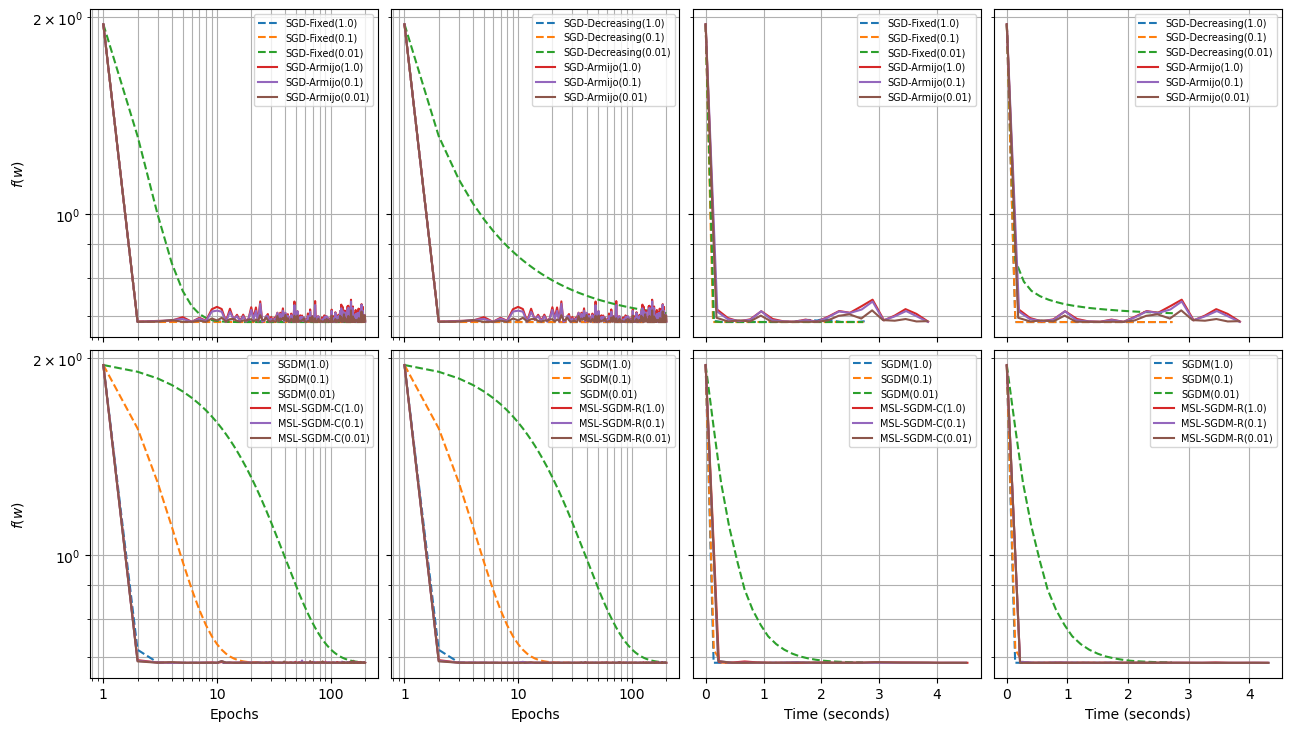

In [81]:
diagnostic(
    optim_data(sgdfixed_phish + sgdarmijo_phish),
    optim_data(sgddecre_phish + sgdarmijo_phish),
    optim_data(sgdm_phish + mslc_phish),
    optim_data(sgdm_phish + mslr_phish),
    benchphish[0])
plt.savefig("./plots/phish-diagnostic.pdf")

## Fine-tuning

In [104]:
batchfixed_phish1 = LogisticRegression("SGD-Fixed", C).fit(data_phish, data_phish[1].size, 0.5)

In [ ]:
sgdfixed_phish1 = LogisticRegression("SGD-Fixed", C).fit(data_phish, Mphish, 0.01)

sgddecre_phish1 = LogisticRegression("SGD-Decreasing", C).fit(data_phish, Mphish, 1)

sgdm_phish1 = LogisticRegression("SGDM", C).fit(data_phish, Mphish, 0.05, 0.9)

In [100]:
sgdarmijo_phish1 = LogisticRegression("SGD-Armijo", C).fit(data_phish, Mphish, 0.01, damp_armijo=0.8)

In [102]:
mslc_phish1 = LogisticRegression("MSL-SGDM-C", C).fit(data_phish, Mphish, 0.5, 0.9)

mslr_phish1 = LogisticRegression("MSL-SGDM-R", C).fit(data_phish, Mphish, 0.5, 0.9)

In [111]:
fine_phish_data = optim_data([batchfixed_phish1, sgdfixed_phish1, sgddecre_phish1, sgdm_phish1, sgdarmijo_phish1, mslc_phish1, mslr_phish1])

test_phish = models_summary(fine_phish_data, benchphish_data).sort_values(by=["l2-Loss", "Grad norm"])
test_phish

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.685065,6.827478e-08,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164188
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.685065,7.684880e-06,NaN,5,0.554274,0.567616,0.500000,0.500000,0.164196
2,CG,0.5,NaN,NaN,NaN,0.685065,2.301399e-05,NaN,6,0.554274,0.567616,0.500000,0.500000,0.164214
5,SGD-Decreasing,0.5,128.0,1.00,0.0,0.685065,6.603894e-04,0.421835,31,0.554274,0.567616,0.500000,0.500000,0.164206
4,SGD-Fixed,0.5,128.0,0.01,0.0,0.685065,8.474703e-04,0.273023,21,0.554274,0.567616,0.500000,0.500000,0.163737
3,SGD-Fixed,0.5,8844.0,0.50,0.0,0.685065,8.287481e-04,0.063251,25,0.554274,0.567616,0.500000,0.500000,0.163889
6,SGDM,0.5,128.0,0.05,0.9,0.685065,8.797276e-04,1.064213,79,0.554274,0.567616,0.500000,0.500000,0.163779
8,MSL-SGDM-C,0.5,128.0,0.50,0.9,0.685705,3.266777e-02,13.559572,600,0.558005,0.568973,0.504186,0.501569,0.153636
9,MSL-SGDM-R,0.5,128.0,0.50,0.9,0.686124,4.371914e-02,12.843879,600,0.554274,0.567616,0.500000,0.500000,0.190606
7,SGD-Armijo,0.5,128.0,0.01,0.0,0.703591,1.821490e-01,11.481668,600,0.554274,0.567616,0.500000,0.500000,0.317461


In [112]:
print(test_phish[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.685065 & 0.000000 & 0.567616 \\
L-BFGS-B & NaN & 5 & NaN & 0.685065 & 0.000008 & 0.567616 \\
CG & NaN & 6 & NaN & 0.685065 & 0.000023 & 0.567616 \\
SGD-Decreasing & 1.000000 & 31 & 0.421835 & 0.685065 & 0.000660 & 0.567616 \\
SGD-Fixed & 0.010000 & 21 & 0.273023 & 0.685065 & 0.000847 & 0.567616 \\
SGD-Fixed & 0.500000 & 25 & 0.063251 & 0.685065 & 0.000829 & 0.567616 \\
SGDM & 0.050000 & 79 & 1.064213 & 0.685065 & 0.000880 & 0.567616 \\
MSL-SGDM-C & 0.500000 & 600 & 13.559572 & 0.685705 & 0.032668 & 0.568973 \\
MSL-SGDM-R & 0.500000 & 600 & 12.843879 & 0.686124 & 0.043719 & 0.567616 \\
SGD-Armijo & 0.010000 & 600 & 11.481668 & 0.703591 & 0.182149 & 0.567616 \\
\bottomrule
\end{tabular}



# a2a

In [113]:
data_a2a = load_a2a()

X_train = (2265, 120), y_train = (2265,)
X_test = (30296, 120), y_test = (30296,)
Class distribution: {-1.0: 0.7474613686534216, 1.0: 0.2525386313465784}


In [114]:
Ma2a = 32
print(f"Iterations: {data_a2a[1].size / Ma2a}")

Iterations: 70.78125


## Benchmark

In [115]:
bencha2a = run_bench(data_a2a, C)

bencha2a_data = optim_bench(bencha2a)

## SGD

In [ ]:
# BatchGD-Fixed
batchfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, data_a2a[1].size)

# SGD-Fixed
sgdfixed_a2a = run_solvers("SGD-Fixed", C, data_a2a, Ma2a)

# SGD-Decreasing
sgddecre_a2a = run_solvers("SGD-Decreasing", C, data_a2a, Ma2a)

# SGDM
sgdm_a2a = run_solvers("SGDM", C, data_a2a, Ma2a)

In [123]:
# SGD-Armijo
sgdarmijo_a2a = run_solvers("SGD-Armijo", C, data_a2a, Ma2a, delta_a=0.25)

In [ ]:
# MSL-SGDM-C
mslc_a2a = run_solvers("MSL-SGDM-C", C, data_a2a, Ma2a)

# MSL-SGDM-R
mslr_a2a = run_solvers("MSL-SGDM-R", C, data_a2a, Ma2a)

In [121]:
modelsa2a_data = optim_data(batchfixed_a2a + sgdfixed_a2a + sgddecre_a2a + sgdm_a2a + sgdarmijo_a2a + mslc_a2a + mslr_a2a)

## Summary

In [118]:
models_summary(modelsa2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
4,SGD-Fixed,0.5,2265.0,0.10,0.0,0.564027,0.000046,0.121964,200,0.748344,0.760265,0.501748,0.500413,0.438971
10,SGD-Decreasing,0.5,32.0,0.10,0.0,0.564027,0.000058,2.376656,200,0.748344,0.760265,0.501748,0.500413,0.438960
9,SGD-Decreasing,0.5,32.0,1.00,0.0,0.564029,0.002519,2.385767,200,0.748344,0.760265,0.501748,0.500413,0.439612
13,SGDM,0.5,32.0,0.10,0.9,0.564033,0.003560,2.351495,200,0.748344,0.760265,0.501748,0.500413,0.439371
8,SGD-Fixed,0.5,32.0,0.01,0.0,0.564040,0.007099,2.373985,200,0.748344,0.760265,0.501748,0.500413,0.440964
12,SGDM,0.5,32.0,1.00,0.9,0.564445,0.026860,2.362023,200,0.748344,0.760529,0.501748,0.501057,0.439078
7,SGD-Fixed,0.5,32.0,0.10,0.0,0.564559,0.025339,2.391918,200,0.748344,0.760331,0.501748,0.500597,0.436755


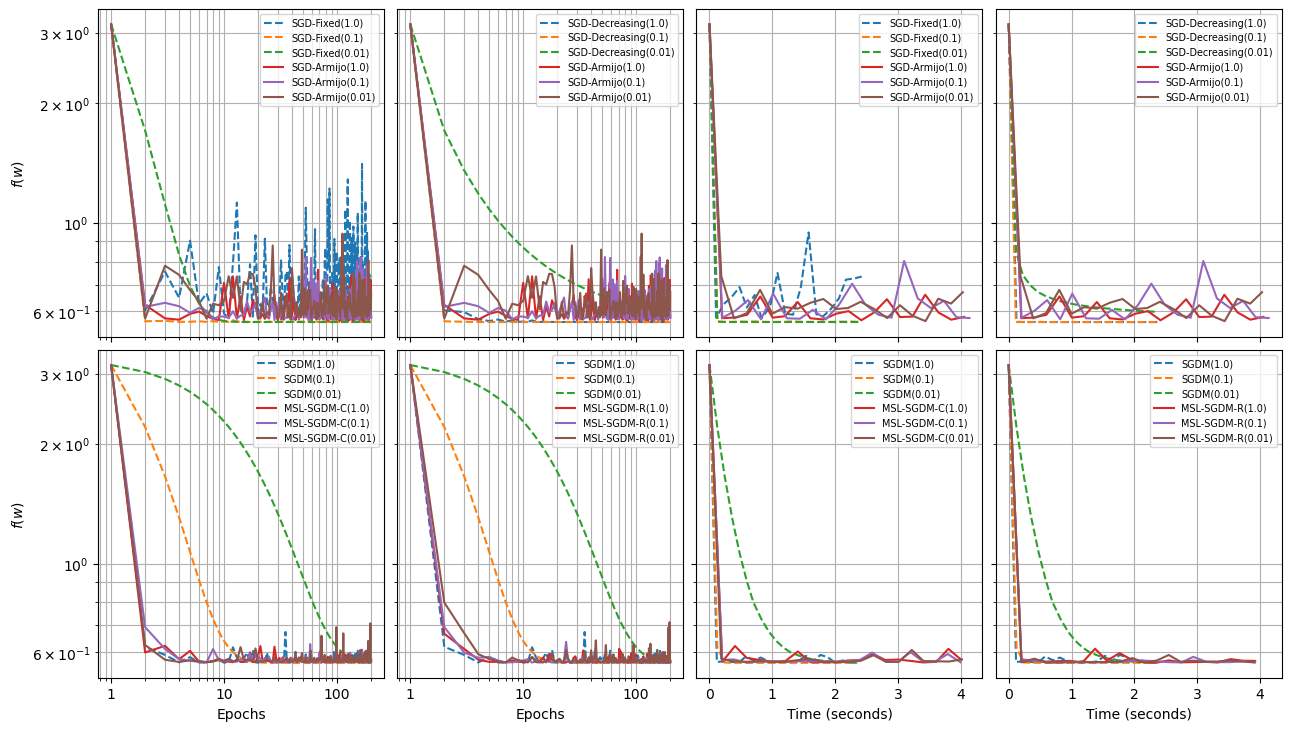

In [124]:
diagnostic(
    optim_data(sgdfixed_a2a + sgdarmijo_a2a),
    optim_data(sgddecre_a2a + sgdarmijo_a2a),
    optim_data(sgdm_a2a + mslc_a2a),
    optim_data(sgdm_a2a + mslr_a2a),
    bencha2a[0])
plt.savefig("./plots/a2a-diagnostic.pdf")

## Fine-tuning

In [125]:
batchfixed_a2a1 = LogisticRegression("SGD-Fixed", C).fit(data_a2a, data_a2a[1].size, 0.5)

In [ ]:
sgdfixed_a2a1 = LogisticRegression("SGD-Fixed", C).fit(data_a2a, Ma2a, 0.001)

sgddecre_a2a1 = LogisticRegression("SGD-Decreasing", C).fit(data_a2a, Ma2a, 0.05)

sgdm_a2a1 = LogisticRegression("SGDM", C).fit(data_a2a, Ma2a, 0.02, 0.9)

In [133]:
sgdarmijo_a2a1 = LogisticRegression("SGD-Armijo", C).fit(data_a2a, Ma2a, 0.01, damp_armijo=0.2)

In [ ]:
mslc_a2a1 = LogisticRegression("MSL-SGDM-C", C).fit(data_a2a, Ma2a, 0.1, 0.9)

mslr_a2a1 = LogisticRegression("MSL-SGDM-R", C).fit(data_a2a, Ma2a, 0.1, 0.9)

In [134]:
fine_a2a_data = optim_data([batchfixed_a2a1, sgdfixed_a2a1, sgddecre_a2a1, sgdm_a2a1, sgdarmijo_a2a1, mslc_a2a1, mslr_a2a1])

test_a2a = models_summary(fine_a2a_data, bencha2a_data).sort_values(by=["l2-Loss", "Grad norm"])
test_a2a

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.564027,0.000004,NaN,5,0.748344,0.760265,0.501748,0.500413,0.438972
2,CG,0.5,NaN,NaN,NaN,0.564027,0.000015,NaN,12,0.748344,0.760265,0.501748,0.500413,0.438961
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.564027,0.000012,NaN,8,0.748344,0.760265,0.501748,0.500413,0.438969
3,SGD-Fixed,0.5,2265.0,0.500,0.0,0.564028,0.000756,0.020425,26,0.748344,0.760265,0.501748,0.500413,0.438952
6,SGDM,0.5,32.0,0.020,0.9,0.564028,0.000917,2.468821,210,0.748344,0.760265,0.501748,0.500413,0.438757
4,SGD-Fixed,0.5,32.0,0.001,0.0,0.564028,0.000986,2.479476,208,0.748344,0.760265,0.501748,0.500413,0.438991
5,SGD-Decreasing,0.5,32.0,0.050,0.0,0.564028,0.000994,0.406210,34,0.748344,0.760265,0.501748,0.500413,0.438938
9,MSL-SGDM-R,0.5,32.0,0.100,0.9,0.566102,0.075915,11.812484,600,0.750110,0.761157,0.505245,0.502364,0.413063
8,MSL-SGDM-C,0.5,32.0,0.100,0.9,0.566957,0.085563,12.078144,600,0.755850,0.768022,0.517187,0.517236,0.448827
7,SGD-Armijo,0.5,32.0,0.010,0.0,0.572869,0.123547,12.179206,600,0.752759,0.764820,0.511647,0.511082,0.461175


In [135]:
print(test_a2a[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.564027 & 0.000004 & 0.760265 \\
CG & NaN & 12 & NaN & 0.564027 & 0.000015 & 0.760265 \\
L-BFGS-B & NaN & 8 & NaN & 0.564027 & 0.000012 & 0.760265 \\
SGD-Fixed & 0.500000 & 26 & 0.020425 & 0.564028 & 0.000756 & 0.760265 \\
SGDM & 0.020000 & 210 & 2.468821 & 0.564028 & 0.000917 & 0.760265 \\
SGD-Fixed & 0.001000 & 208 & 2.479476 & 0.564028 & 0.000986 & 0.760265 \\
SGD-Decreasing & 0.050000 & 34 & 0.406210 & 0.564028 & 0.000994 & 0.760265 \\
MSL-SGDM-R & 0.100000 & 600 & 11.812484 & 0.566102 & 0.075915 & 0.761157 \\
MSL-SGDM-C & 0.100000 & 600 & 12.078144 & 0.566957 & 0.085563 & 0.768022 \\
SGD-Armijo & 0.010000 & 600 & 12.179206 & 0.572869 & 0.123547 & 0.764820 \\
\bottomrule
\end{tabular}



# Mushrooms

In [136]:
data_mush = load_mushrooms()

X_train = (6499, 113), y_train = (6499,)
X_test = (1625, 113), y_test = (1625,)
Class distribution: {-1: 0.48222803508232037, 1: 0.5177719649176796}


In [196]:
Mmush = 128
print(f"Iterations: {data_mush[1].size / Mmush}")

Iterations: 50.7734375


## Benchmark

In [138]:
benchMush = run_bench(data_mush, C)

benchMush_data = optim_bench(benchMush)

## SGD

In [197]:
# BatchGD-Fixed
batchfixed_mush = run_solvers("SGD-Fixed", C, data_mush, data_mush[1].size)

# SGD-Fixed
sgdfixed_mush = run_solvers("SGD-Fixed", C, data_mush, Mmush)

# SGD-Decreasing
sgddecre_mush = run_solvers("SGD-Decreasing", C, data_mush, Mmush)

# SGDM
sgdm_mush = run_solvers("SGDM", C, data_mush, Mmush)

# SGD-Armijo
sgdarmijo_mush = run_solvers("SGD-Armijo", C, data_mush, Mmush)

# MSL-SGDM-C
mslc_mush = run_solvers("MSL-SGDM-C", C, data_mush, Mmush)

# MSL-SGDM-R
mslr_mush = run_solvers("MSL-SGDM-R", C, data_mush, Mmush)

In [198]:
modelsMush_data = optim_data(batchfixed_mush + sgdfixed_mush + sgddecre_mush + sgdm_mush + sgdarmijo_mush + mslc_mush + mslr_mush)

## Summary

In [199]:
models_summary(modelsMush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
10,SGD-Decreasing,0.5,128.0,0.10,0.0,0.517726,0.000011,1.938504,200,0.895522,0.892923,0.892406,0.889580,0.635940
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
4,SGD-Fixed,0.5,6499.0,0.10,0.0,0.517726,0.000046,0.312467,200,0.895522,0.892923,0.892406,0.889580,0.635932
9,SGD-Decreasing,0.5,128.0,1.00,0.0,0.517726,0.000244,1.950231,200,0.895522,0.892923,0.892406,0.889580,0.636065
8,SGD-Fixed,0.5,128.0,0.01,0.0,0.517727,0.002024,1.956155,200,0.895215,0.892923,0.892087,0.889580,0.636349
13,SGDM,0.5,128.0,0.10,0.9,0.517738,0.008058,1.921830,200,0.896138,0.894769,0.893077,0.891498,0.635850
12,SGDM,0.5,128.0,1.00,0.9,0.517911,0.027192,1.937485,200,0.898292,0.897231,0.895332,0.894055,0.637874
7,SGD-Fixed,0.5,128.0,0.10,0.0,0.517936,0.027047,1.937875,200,0.896753,0.894154,0.893737,0.890905,0.641649


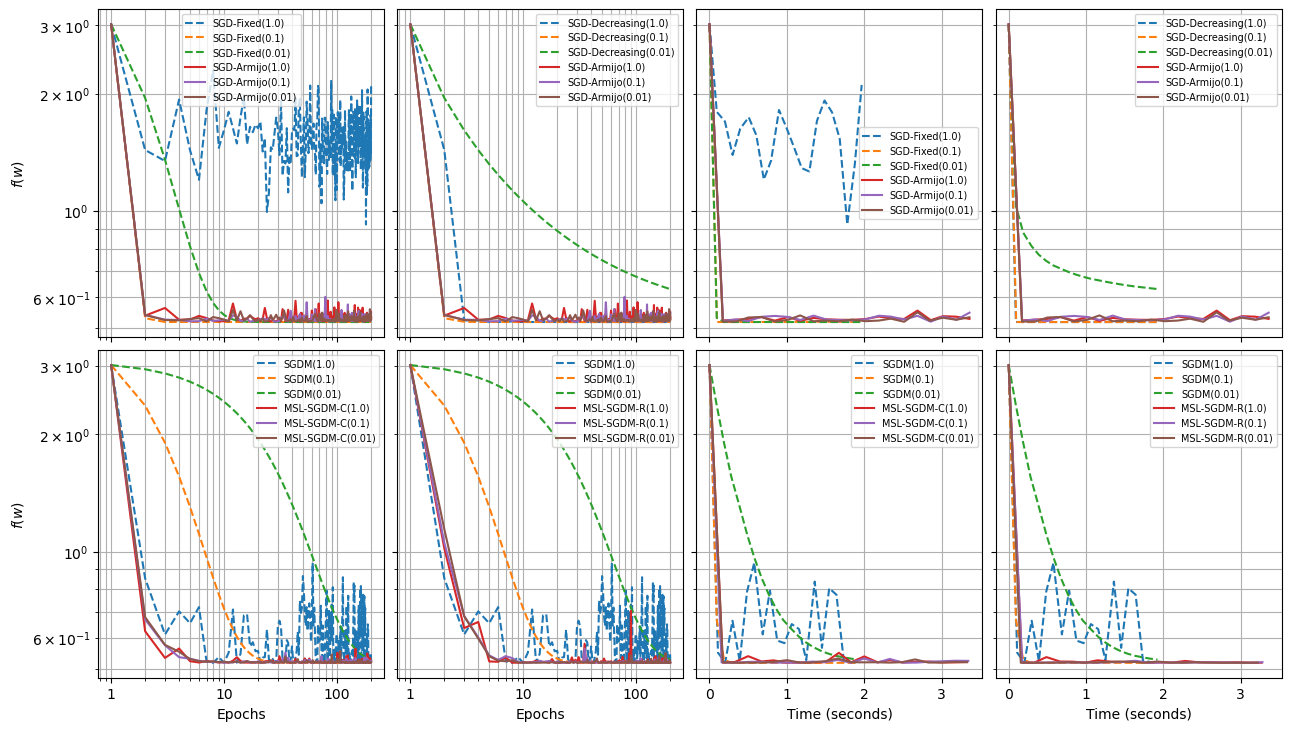

In [200]:
diagnostic(
    optim_data(sgdfixed_mush + sgdarmijo_mush),
    optim_data(sgddecre_mush + sgdarmijo_mush),
    optim_data(sgdm_mush + mslc_mush),
    optim_data(sgdm_mush + mslr_mush),
    benchMush[0])
plt.savefig("./plots/mush-diagnostic.pdf")

## Fine-tuning

In [ ]:
batchfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, data_mush[1].size, 0.05)

sgdfixed_mush1 = LogisticRegression("SGD-Fixed", C).fit(data_mush, Mmush, 0.001)

sgddecre_mush1 = LogisticRegression("SGD-Decreasing", C).fit(data_mush, Mmush, 0.1)

sgdm_mush1 = LogisticRegression("SGDM", C).fit(data_mush, Mmush, 0.03, 0.9)

In [ ]:
sgdarmijo_mush1 = LogisticRegression("SGD-Armijo", C).fit(data_mush, Mmush, 0.01)

mslc_mush1 = LogisticRegression("MSL-SGDM-C", C).fit(data_mush, Mmush, 0.025, 0.9)

mslr_mush1 = LogisticRegression("MSL-SGDM-R", C).fit(data_mush, Mmush, 0.025, 0.9)

In [202]:
fine_mush_data = optim_data([batchfixed_mush1, sgdfixed_mush1, sgddecre_mush1, sgdm_mush1, sgdarmijo_mush1, mslc_mush1, mslr_mush1])

test_mush = models_summary(fine_mush_data, benchMush_data).sort_values(by=["l2-Loss", "Grad norm"])
test_mush

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.517726,0.000003,NaN,7,0.895522,0.892923,0.892406,0.889580,0.635933
2,CG,0.5,NaN,NaN,NaN,0.517726,0.000024,NaN,11,0.895522,0.892923,0.892406,0.889580,0.635939
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.517726,0.000017,NaN,10,0.895522,0.892923,0.892406,0.889580,0.635930
5,SGD-Decreasing,0.5,128.0,0.100,0.0,0.517727,0.000622,0.124991,13,0.895522,0.892923,0.892406,0.889580,0.635942
6,SGDM,0.5,128.0,0.030,0.9,0.517727,0.000903,1.855943,192,0.895215,0.892923,0.892087,0.889580,0.635708
4,SGD-Fixed,0.5,128.0,0.001,0.0,0.517727,0.000988,2.814241,289,0.895369,0.892923,0.892246,0.889580,0.635895
3,SGD-Fixed,0.5,6499.0,0.050,0.0,0.517727,0.000997,0.448186,285,0.895369,0.892923,0.892246,0.889580,0.635888
9,MSL-SGDM-R,0.5,128.0,0.025,0.9,0.518412,0.043708,9.859336,600,0.897830,0.892923,0.894525,0.889256,0.636471
8,MSL-SGDM-C,0.5,128.0,0.025,0.9,0.519080,0.073248,10.088218,600,0.893214,0.887385,0.889848,0.883640,0.639591
7,SGD-Armijo,0.5,128.0,0.010,0.0,0.521178,0.066312,10.140186,600,0.895215,0.889231,0.892163,0.885882,0.663904


In [203]:
print(test_mush[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 7 & NaN & 0.517726 & 0.000003 & 0.892923 \\
CG & NaN & 11 & NaN & 0.517726 & 0.000024 & 0.892923 \\
L-BFGS-B & NaN & 10 & NaN & 0.517726 & 0.000017 & 0.892923 \\
SGD-Decreasing & 0.100000 & 13 & 0.124991 & 0.517727 & 0.000622 & 0.892923 \\
SGDM & 0.030000 & 192 & 1.855943 & 0.517727 & 0.000903 & 0.892923 \\
SGD-Fixed & 0.001000 & 289 & 2.814241 & 0.517727 & 0.000988 & 0.892923 \\
SGD-Fixed & 0.050000 & 285 & 0.448186 & 0.517727 & 0.000997 & 0.892923 \\
MSL-SGDM-R & 0.025000 & 600 & 9.859336 & 0.518412 & 0.043708 & 0.892923 \\
MSL-SGDM-C & 0.025000 & 600 & 10.088218 & 0.519080 & 0.073248 & 0.887385 \\
SGD-Armijo & 0.010000 & 600 & 10.140186 & 0.521178 & 0.066312 & 0.889231 \\
\bottomrule
\end{tabular}



# German

In [146]:
data_german = load_german()

X_train = (800, 25), y_train = (800,)
X_test = (200, 25), y_test = (200,)
Class distribution: {-1.0: 0.69875, 1.0: 0.30125}


In [147]:
Mgerman = 16
print(f"Iterations: {data_german[1].size / Mgerman}")

Iterations: 50.0


## Benchmark

In [148]:
benchgerman = run_bench(data_german, C)

benchgerman_data = optim_bench(benchgerman)

## SGD

In [ ]:
# BatchGD-Fixed
batchfixed_german = run_solvers("SGD-Fixed", C, data_german, data_german[1].size)

# SGD-Fixed
sgdfixed_german = run_solvers("SGD-Fixed", C, data_german, Mgerman)

# SGD-Decreasing
sgddecre_german = run_solvers("SGD-Decreasing", C, data_german, Mgerman)

# SGDM
sgdm_german = run_solvers("SGDM", C, data_german, Mgerman)

In [181]:
# SGD-Armijo
sgdarmijo_german = run_solvers("SGD-Armijo", C, data_german, Mgerman, delta_a=0.6)

In [177]:
# MSL-SGDM-C
mslc_german = run_solvers("MSL-SGDM-C", C, data_german, Mgerman, delta_a=0.3)

# MSL-SGDM-R
mslr_german = run_solvers("MSL-SGDM-R", C, data_german, Mgerman, delta=0.3)

In [179]:
modelsgerman_data = optim_data(batchfixed_german + sgdfixed_german + sgddecre_german + sgdm_german + sgdarmijo_german + mslc_german + mslr_german)

## Summary

In [180]:
models_summary(modelsgerman_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
4,SGD-Fixed,0.5,800.0,0.10,0.0,0.597303,0.000007,0.093733,200,0.70375,0.710,0.511839,0.513403,0.358503
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
10,SGD-Decreasing,0.5,16.0,0.10,0.0,0.597303,0.000081,1.687572,200,0.70375,0.710,0.511839,0.513403,0.358516
9,SGD-Decreasing,0.5,16.0,1.00,0.0,0.597304,0.002657,1.703079,200,0.70375,0.710,0.511839,0.513403,0.357565
13,SGDM,0.5,16.0,0.10,0.9,0.597312,0.003659,1.671868,200,0.70375,0.710,0.511839,0.513403,0.356870
8,SGD-Fixed,0.5,16.0,0.01,0.0,0.597325,0.010176,1.687435,200,0.70375,0.710,0.511839,0.513403,0.355071
14,SGDM,0.5,16.0,0.01,0.9,0.598529,0.038325,1.672016,200,0.70375,0.710,0.510659,0.513403,0.347489
7,SGD-Fixed,0.5,16.0,0.10,0.0,0.598941,0.053905,1.687578,200,0.70125,0.700,0.504149,0.496454,0.338814


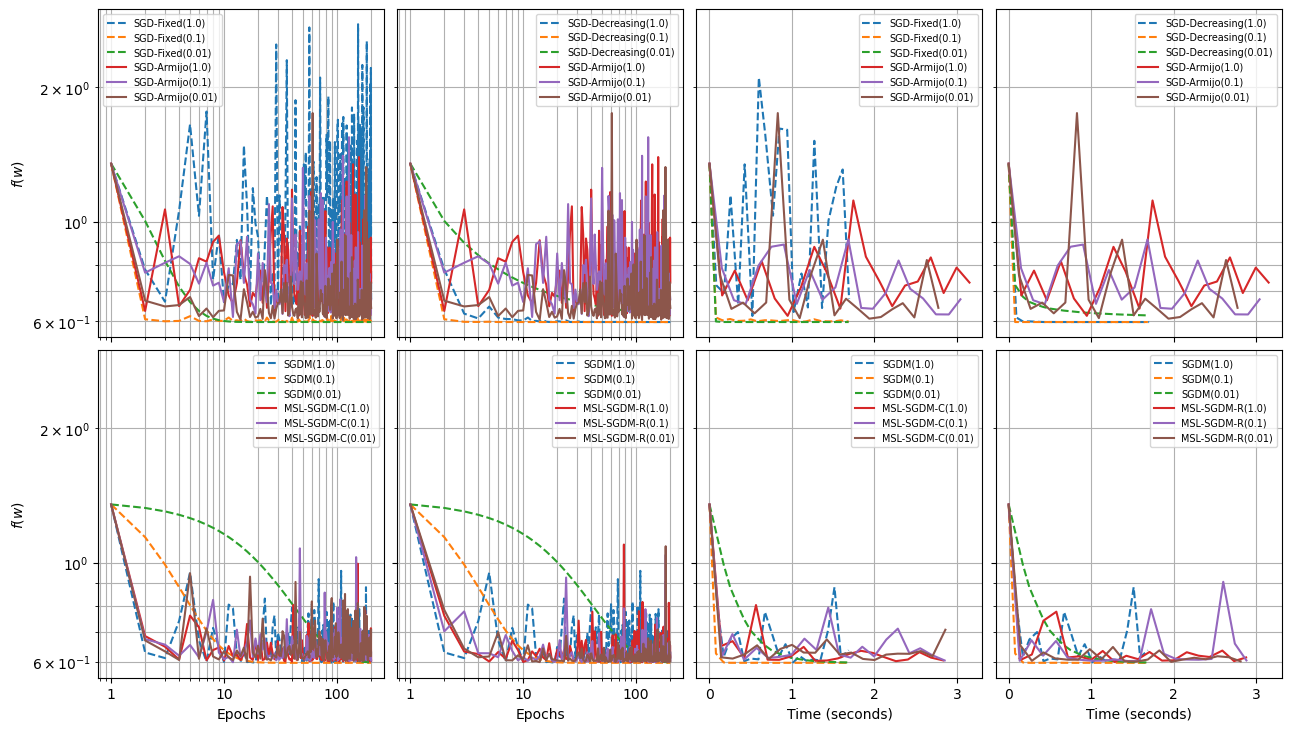

In [182]:
diagnostic(
    optim_data(sgdfixed_german + sgdarmijo_german),
    optim_data(sgddecre_german + sgdarmijo_german),
    optim_data(sgdm_german + mslc_german),
    optim_data(sgdm_german + mslr_german),
    benchgerman[0])
plt.savefig("./plots/german-diagnostic.pdf")

## Fine-tuning

In [183]:
batchfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, data_german[1].size, 0.5)

In [184]:
sgdfixed_german1 = LogisticRegression("SGD-Fixed", C).fit(data_german, Mgerman, 0.001)

In [ ]:
sgddecre_german1 = LogisticRegression("SGD-Decreasing", C).fit(data_german, Mgerman, 0.25)

In [190]:
sgdm_german1 = LogisticRegression("SGDM", C).fit(data_german, Mgerman, 0.01, 0.9)

In [186]:
sgdarmijo_german1 = LogisticRegression("SGD-Armijo", C).fit(data_german, Mgerman, 0.05)

In [187]:
mslc_german1 = LogisticRegression("MSL-SGDM-C", C).fit(data_german, Mgerman, 0.5, 0.9)

In [188]:
mslr_german1 = LogisticRegression("MSL-SGDM-R", C).fit(data_german, Mgerman, 0.5, 0.9)

In [191]:
fine_german_data = optim_data([batchfixed_german1, sgdfixed_german1, sgddecre_german1, sgdm_german1, sgdarmijo_german1, mslc_german1, mslr_german1])

test_german = models_summary(fine_german_data, benchgerman_data).sort_values(by=["l2-Loss", "Grad norm"])
test_german

,Solver,C,Minibatch,Alpha0,Beta0,l2-Loss,Grad norm,Run-time,Epochs,Train score,Test score,Bal train score,Bal test score,Sol norm
1,Newton-CG,0.5,NaN,NaN,NaN,0.597303,0.000010,NaN,5,0.70375,0.710,0.511839,0.513403,0.358504
2,CG,0.5,NaN,NaN,NaN,0.597303,0.000004,NaN,12,0.70375,0.710,0.511839,0.513403,0.358506
0,L-BFGS-B,0.5,NaN,NaN,NaN,0.597303,0.000014,NaN,7,0.70375,0.710,0.511839,0.513403,0.358506
5,SGD-Decreasing,0.5,16.0,0.250,0.0,0.597303,0.000700,0.361343,42,0.70375,0.710,0.511839,0.513403,0.358848
3,SGD-Fixed,0.5,800.0,0.500,0.0,0.597303,0.000882,0.010634,20,0.70375,0.710,0.511839,0.513403,0.358324
6,SGDM,0.5,16.0,0.010,0.9,0.597303,0.000974,4.061424,482,0.70375,0.710,0.511839,0.513403,0.358654
4,SGD-Fixed,0.5,16.0,0.001,0.0,0.597303,0.000985,1.970545,231,0.70375,0.710,0.511839,0.513403,0.358262
9,MSL-SGDM-R,0.5,16.0,0.500,0.9,0.601524,0.090918,8.571129,600,0.70500,0.705,0.516275,0.509857,0.337392
8,MSL-SGDM-C,0.5,16.0,0.500,0.9,0.619598,0.269061,8.865525,600,0.70250,0.700,0.506224,0.496454,0.419864
7,SGD-Armijo,0.5,16.0,0.050,0.0,0.892683,0.978264,9.004771,600,0.69875,0.705,0.500000,0.500000,0.783305


In [192]:
print(test_german[["Solver", "Alpha0", "Epochs", "Run-time", "l2-Loss", "Grad norm", "Test score"]].to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
Solver & Alpha0 & Epochs & Run-time & l2-Loss & Grad norm & Test score \\
\midrule
Newton-CG & NaN & 5 & NaN & 0.597303 & 0.000010 & 0.710000 \\
CG & NaN & 12 & NaN & 0.597303 & 0.000004 & 0.710000 \\
L-BFGS-B & NaN & 7 & NaN & 0.597303 & 0.000014 & 0.710000 \\
SGD-Decreasing & 0.250000 & 42 & 0.361343 & 0.597303 & 0.000700 & 0.710000 \\
SGD-Fixed & 0.500000 & 20 & 0.010634 & 0.597303 & 0.000882 & 0.710000 \\
SGDM & 0.010000 & 482 & 4.061424 & 0.597303 & 0.000974 & 0.710000 \\
SGD-Fixed & 0.001000 & 231 & 1.970545 & 0.597303 & 0.000985 & 0.710000 \\
MSL-SGDM-R & 0.500000 & 600 & 8.571129 & 0.601524 & 0.090918 & 0.705000 \\
MSL-SGDM-C & 0.500000 & 600 & 8.865525 & 0.619598 & 0.269061 & 0.700000 \\
SGD-Armijo & 0.050000 & 600 & 9.004771 & 0.892683 & 0.978264 & 0.705000 \\
\bottomrule
\end{tabular}

